# Homework 3: Visualizing Data with Movies

Name: Rome Drori

Date: 2/11/25

#### Overview
In this homework, you'll create a movie visualization of a model parameter such as temperature, salinity, velocity, or any other field which may be of interest to you. 

As an example, I've provided a movie of circulation in the Equatorial Pacific from the NASA ECCO Version 5 State Estimate. For the purposes of this visualization, I subsetted the Equatorial Pacific is the region between 155-75$^{\circ}$W and $\pm$20$^{\circ}$N.

#### Import Modules
Import the modules required to access data from netCDF files, plot it, and stitch panels together into a movie:

In [1]:
# import modules here
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import moviepy.video.io.ImageSequenceClip
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Part 1: Download Data
To begin this exercise, download all of the available data for your variable of interest over the timespan of interest.

For the example provided, I've used daily sea surface temperature data for a given year (2015) from the ECCO Version 5 Alpha output [HERE](https://ecco.jpl.nasa.gov/drive/files/Version5/Alpha/latlon_daily/SST.nc).

To obtain your data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes. Be sure to edit the fields to obtain the correct data.

In [2]:
# define the path to the data folder
data_folder = 'C:/Users/romed/Desktop/practicalcomputingtopics/cs185c_fall2025/homework/homework_3'

## Part 2: Create a Single Plot of Sea Surface Temperature
Before making a movie, its useful to fine tune a single plot to get the details right. Once you've got your plot lookin' good, you can loop through all of the data to generate the panels of your movie.

Here, make a plot of one variable field. 

Begin by reading in the longitude, latitude, and SST fields from the netCDF file:

In [3]:
# read in the data
data_file = os.path.join(data_folder,'ECCO','Version5' ,'Alpha' ,'latlon_daily' ,'SST', 'SST_20090109.nc')
ds = xr.open_dataset(data_file, decode_times=False)
display(ds)
sst = np.array(ds['SST'][:])
lat = np.array(ds['LATITUDE_T'][:])
lon = np.array(ds['LONGITUDE_T'][:])

ds.close()

print(sst)
print(lon)
print(lat)

<xarray.Dataset> Size: 4MB
Dimensions:      (TIME: 1, LATITUDE_T: 720, LONGITUDE_T: 1440)
Coordinates:
  * TIME         (TIME) float32 4B 6.218e+03
  * LATITUDE_T   (LATITUDE_T) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * LONGITUDE_T  (LONGITUDE_T) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    SST          (TIME, LATITUDE_T, LONGITUDE_T) float32 4MB ...
Attributes:
    description:  ECCO LLC270 daily average

[[[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  ...
  [-1.9436923 -1.9436721 -1.9436518 ... -1.9437536 -1.9437331 -1.9437127]
  [-1.9456224 -1.9455941 -1.9455656 ... -1.9457095 -1.9456805 -1.9456514]
  [-1.9495705 -1.9495621 -1.9495535 ... -1.9495963 -1.9495877 -1.9495792]]]
[-179.875 -179.625 -179.375 ...  179.375  179.625  179.875]
[-89.875 -89.625 -89.375 -89.125 -88.875 -88.625 -88.375 -88.125 -87.875
 -87.625 -87.375 -87.125 -86.875 -86.625 -86.375 -86.125 -85.875 -85.625
 -85.375 -85.125 -84.875 -84.625 -84.375 -84.125 -83.875 -83.625 -83.375
 -83.125 -82.875 -82.625 -82.375 -82.125 -81.875 -81.625 -81.375 -81.125
 -80.875 -80.625 -80.375 -80.125 -79.875 -79.625 -79.375 -79.125 -78.875
 -78.625 -78.375 -78.125 -77.875 -77.625 -77.375 -77.125 -76.875 -76.625
 -76.375 -76.125 -75.875 -75.625 -75.375 -75.125 -

Next, find the locations of the longitude and latitude bounds within the global grid for your region of interest:

In [4]:
# define the longitude/latitude bounds
min_lon = -40
max_lon = 40
min_lat = -60
max_lat = 20

# compute the min/max row/col in the data grid
min_row = np.argmin(np.abs(lat - min_lat))
max_row = np.argmin(np.abs(lat - max_lat))
min_col = np.argmin(np.abs(lon - min_lon))
max_col = np.argmin(np.abs(lon - max_lon))
print(f'min_row:{min_row}, max_row:{max_row}\nmin_col:{min_col}, max_col:{max_col}')

min_row:119, max_row:439
min_col:559, max_col:879


Use the row and column bounds to subset the longitude, latitude, and your variable:

In [5]:
# subset the data
SST_subset = sst[:, min_row:max_row + 1, min_col:max_col + 1]  
longitude_subset = lon[min_col:max_col + 1]
latitude_subset = lat[min_row:max_row + 1]  


print(SST_subset.shape)
print(longitude_subset.shape)
print(latitude_subset.shape)

(1, 321, 321)
(321,)
(321,)


Finally, make a plot with your subsetted data. For the plot specification, you can use any colormap, data range, and format as you like.

For my example, I find that the temperature plot looks nice with a figure size of (8,4), a turbo colormap, and a data range of 20-31. However, you are encouraged to format your plot to your tastes.

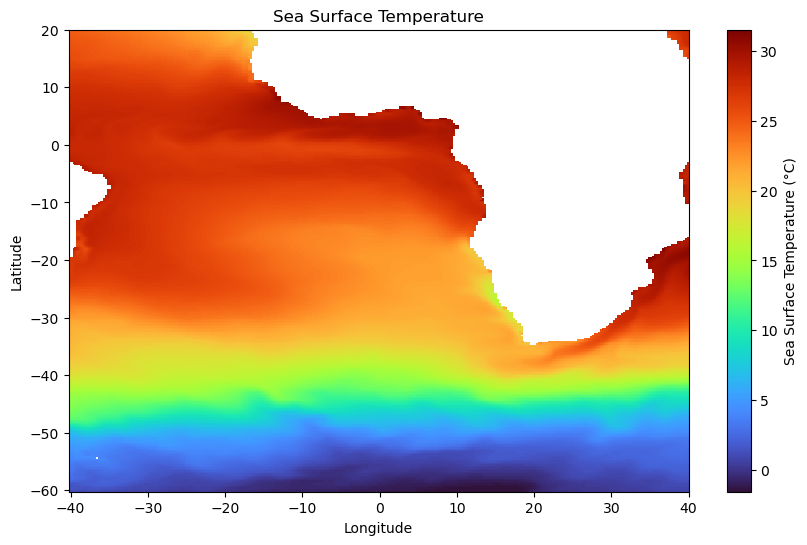

In [6]:
# make your figure here

plt.figure(figsize=(10, 6))
plt.pcolormesh(longitude_subset, latitude_subset, SST_subset[0], 
               cmap='turbo', shading='auto')
plt.colorbar(label='Sea Surface Temperature (°C)')

# Set the axis labels and title.
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sea Surface Temperature')



# Display the plot
plt.show()

## Part 3: Formulate a Plotting Function
When you are happy with your plot, make your code into a function that will take the year, month, and day as inputs, and output the figure into a given directory. 

In [9]:
def plot_panel(year, month, day):
    date_str = f"{year:04d}{month:02d}{day:02d}"
    file_name = f"SST_{date_str}.nc"
    data_file = os.path.join(data_folder, 'ECCO', 'Version5', 'Alpha', 'latlon_daily', 'SST', file_name)
    ds = xr.open_dataset(data_file, decode_times=False)
    sst = np.array(ds['SST'][:])
    lat = np.array(ds['LATITUDE_T'][:])
    lon = np.array(ds['LONGITUDE_T'][:])
    ds.close()
    SST_subset = sst[:, min_row:max_row + 1, min_col:max_col + 1]  
    longitude_subset = lon[min_col:max_col + 1]
    latitude_subset = lat[min_row:max_row + 1]  

    # Create the plot.
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(longitude_subset, latitude_subset, SST_subset[0],
                   cmap='turbo', shading='auto')
    plt.colorbar(label='Sea Surface Temperature (°C)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Sea Surface Temperature on {year}-{month:02d}-{day:02d}')
    
    # Define the output directory for the panel images.
    output_dir = os.path.join(data_folder, 'panels')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Save the figure.
    output_file = os.path.join(output_dir, f'panel_{date_str}.png')
    plt.savefig(output_file)
    plt.close()  # Close the figure to free memory.


Once the function is complete, use it to loop through all of the data to make a plot for each day of the year. The following lines of code will form the panels of a data visualization movie when using daily data. If you are using monthly data, update accordingly:

In [11]:
# loop through the data and make a plot for each day
year = 2009
for month in range(1,13):
    if month in [1,3,5,7,8,10,12]:
        n_days = 31
    elif month in [4,6,9,11]:
        n_days = 30
    else:
        if year%4==0:
            n_days = 29
        else:
            n_days = 28
    for day in range(1,n_days+1):
        plot_panel(year,month,day)

## Part 4: Compile Panels into a Movie
After creating all of the panels, stitch them together into a movie using moviepy:

In [13]:
# make a list of files for each movie panel
panels_dir = os.path.join(data_folder, 'panels')
panel_files = [os.path.join(panels_dir, file) for file in os.listdir(panels_dir) if file.endswith('.png')]
# sort the panels
panel_files.sort()






In [14]:
# set the frames per second
fps = 10 

# use the ImageSequenceClip module to set up the clip
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip
clip = ImageSequenceClip(panel_files, fps=fps)

# write the video to a file
output_video = os.path.join(data_folder, 'SST_movie.mp4')
clip.write_videofile(output_video)

Moviepy - Building video C:/Users/romed/Desktop/practicalcomputingtopics/cs185c_fall2025/homework/homework_3\SST_movie.mp4.
Moviepy - Writing video C:/Users/romed/Desktop/practicalcomputingtopics/cs185c_fall2025/homework/homework_3\SST_movie.mp4



Moviepy - Done !
Moviepy - video ready C:/Users/romed/Desktop/practicalcomputingtopics/cs185c_fall2025/homework/homework_3\SST_movie.mp4


## Part 5: Interpret Features in the Movie
A movie gives a good visualization of the physical processes occurring in a model. Describe one feature you see in the movie and relate it to an oceanographic feature. It could be a feature discussed in class or another feature you noticed and researched on your own.

Answer: There seems to be a clear cooling wave sort of thing that is flowing away from the coast of africa this is likely a product of coastal upwelling causing there to be sort of a temprature wave that is moving offshore and away from the continent